In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [353]:
df = pd.read_csv('C:/Users/LENOVO/Documents/My_Documents/Coding projects/Laptop price prediction/dataset/laptop_data.csv')

In [354]:
df.reset_index(drop=True)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [355]:
df = df.drop('Unnamed: 0',axis =1)

In [356]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [357]:
df[df['Gpu'].str.contains('RTX',case=False,na=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price


In [358]:

# Prepare 20 realistic RTX laptop entries across ASUS, Dell, MSI, HP, Lenovo, Acer
new_rows = [
    {"Company":"ASUS","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.3kg","Price":125000.0},
    {"Company":"ASUS","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i9 12900H 2.5GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3080","OpSys":"Windows 11","Weight":"2.8kg","Price":235000.0},
    {"Company":"ASUS","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"QHD 2560x1440","Cpu":"AMD Ryzen 9 6900HX 3.3GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3070 Ti","OpSys":"Windows 11","Weight":"2.4kg","Price":185000.0},
    {"Company":"Dell","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 11800H 2.3GHz","Ram":"16GB","Memory":"512GB SSD","Gpu":"NVIDIA GeForce RTX 3050 Ti","OpSys":"Windows 10","Weight":"2.2kg","Price":110000.0},
    {"Company":"Dell","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"Intel Core i9 12900HK 2.5GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4080","OpSys":"Windows 11","Weight":"2.5kg","Price":260000.0},
    {"Company":"Dell","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.3kg","Price":130000.0},
    {"Company":"MSI","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"Intel Core i9 12900HX 2.6GHz","Ram":"32GB","Memory":"2TB SSD","Gpu":"NVIDIA GeForce RTX 4090","OpSys":"Windows 11","Weight":"2.6kg","Price":350000.0},
    {"Company":"MSI","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3070","OpSys":"Windows 11","Weight":"2.3kg","Price":150000.0},
    {"Company":"MSI","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"Full HD 1920x1080","Cpu":"AMD Ryzen 7 6800H 3.2GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.9kg","Price":140000.0},
    {"Company":"HP","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"512GB SSD","Gpu":"NVIDIA GeForce RTX 3050","OpSys":"Windows 11","Weight":"2.1kg","Price":105000.0},
    {"Company":"HP","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"Intel Core i7 13700H 2.4GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4070","OpSys":"Windows 11","Weight":"2.4kg","Price":198000.0},
    {"Company":"HP","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i9 12900H 2.5GHz","Ram":"32GB","Memory":"2TB SSD","Gpu":"NVIDIA GeForce RTX 3080","OpSys":"Windows 11","Weight":"3.0kg","Price":220000.0},
    {"Company":"Lenovo","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"AMD Ryzen 9 6900HX 3.3GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3070","OpSys":"Windows 11","Weight":"2.4kg","Price":165000.0},
    {"Company":"Lenovo","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12650H 2.3GHz","Ram":"16GB","Memory":"512GB SSD","Gpu":"NVIDIA GeForce RTX 3050 Ti","OpSys":"Windows 11","Weight":"2.2kg","Price":115000.0},
    {"Company":"Lenovo","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.5kg","Price":135000.0},
    {"Company":"Acer","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i9 11900H 2.5GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3080","OpSys":"Windows 11","Weight":"2.9kg","Price":205000.0},
    {"Company":"Acer","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 11800H 2.3GHz","Ram":"16GB","Memory":"512GB SSD","Gpu":"NVIDIA GeForce RTX 3050","OpSys":"Windows 11","Weight":"2.2kg","Price":102000.0},
    {"Company":"Acer","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"AMD Ryzen 7 6800H 3.2GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.5kg","Price":138000.0},
    {"Company":"ASUS","TypeName":"Gaming","Inches":14.0,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 1260P 2.1GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3050","OpSys":"Windows 11","Weight":"1.8kg","Price":120000.0},
    {"Company":"Dell","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"QHD 2560x1440","Cpu":"Intel Core i7 13620H 2.6GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4060","OpSys":"Windows 11","Weight":"2.2kg","Price":145000.0},
    {"Company":"Asus","TypeName":"Gaming","Inches":14.0,"ScreenResolution":"Full HD 1920x1080","Cpu":"AMD Ryzen 9 6900HS 3.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4060","OpSys":"Windows 11","Weight":"1.7kg","Price":155000.0},
    {"Company":"Razer","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"QHD 2560x1440","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4070","OpSys":"Windows 11","Weight":"2.1kg","Price":245000.0},
    {"Company":"HP","TypeName":"Gaming","Inches":16.1,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 13700H 2.4GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4060","OpSys":"Windows 11","Weight":"2.5kg","Price":195000.0},
    {"Company":"MSI","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"QHD 2560x1440","Cpu":"Intel Core i9 12900HX 2.5GHz","Ram":"32GB","Memory":"2TB SSD","Gpu":"NVIDIA GeForce RTX 4090","OpSys":"Windows 11","Weight":"2.9kg","Price":380000.0},
    {"Company":"Lenovo","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"AMD Ryzen 9 6900HX 3.3GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4070","OpSys":"Windows 11","Weight":"2.4kg","Price":185000.0},
    {"Company":"Acer","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"512GB SSD","Gpu":"NVIDIA GeForce RTX 3060","OpSys":"Windows 11","Weight":"2.3kg","Price":128000.0},
    {"Company":"Asus","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"QHD 2560x1440","Cpu":"Intel Core i9 12900H 2.5GHz","Ram":"32GB","Memory":"2TB SSD","Gpu":"NVIDIA GeForce RTX 4080","OpSys":"Windows 11","Weight":"3.0kg","Price":295000.0},
    {"Company":"Razer","TypeName":"Gaming","Inches":16.0,"ScreenResolution":"QHD 2560x1600","Cpu":"Intel Core i7 13700H 2.4GHz","Ram":"32GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 4080","OpSys":"Windows 11","Weight":"2.5kg","Price":275000.0},
    {"Company":"MSI","TypeName":"Gaming","Inches":15.6,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i7 12700H 2.3GHz","Ram":"16GB","Memory":"1TB SSD","Gpu":"NVIDIA GeForce RTX 3070","OpSys":"Windows 11","Weight":"2.3kg","Price":152000.0},
    {"Company":"HP","TypeName":"Gaming","Inches":17.3,"ScreenResolution":"Full HD 1920x1080","Cpu":"Intel Core i9 12900H 2.5GHz","Ram":"32GB","Memory":"2TB SSD","Gpu":"NVIDIA GeForce RTX 3080","OpSys":"Windows 11","Weight":"3.0kg","Price":225000.0},
]


new_df = pd.DataFrame(new_rows)

In [359]:
df = pd.concat([df,new_df])

In [360]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.0000
26,Asus,Gaming,17.3,QHD 2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.0000
27,Razer,Gaming,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.0000
28,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.0000


In [361]:
df[df['Gpu'].str.contains('RTX',case=False,na=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,ASUS,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,125000.0
1,ASUS,Gaming,17.3,Full HD 1920x1080,Intel Core i9 12900H 2.5GHz,32GB,1TB SSD,NVIDIA GeForce RTX 3080,Windows 11,2.8kg,235000.0
2,ASUS,Gaming,15.6,QHD 2560x1440,AMD Ryzen 9 6900HX 3.3GHz,32GB,1TB SSD,NVIDIA GeForce RTX 3070 Ti,Windows 11,2.4kg,185000.0
3,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 11800H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3050 Ti,Windows 10,2.2kg,110000.0
4,Dell,Gaming,16.0,QHD 2560x1600,Intel Core i9 12900HK 2.5GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,260000.0
5,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,130000.0
6,MSI,Gaming,16.0,QHD 2560x1600,Intel Core i9 12900HX 2.6GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4090,Windows 11,2.6kg,350000.0
7,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,150000.0
8,MSI,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 7 6800H 3.2GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.9kg,140000.0
9,HP,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3050,Windows 11,2.1kg,105000.0


In [362]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
25,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.0
26,Asus,Gaming,17.3,QHD 2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.0
27,Razer,Gaming,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.0
28,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.0
29,HP,Gaming,17.3,Full HD 1920x1080,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 3080,Windows 11,3.0kg,225000.0


In [363]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    216
6GB      41
32GB     31
12GB     25
2GB      22
24GB      3
64GB      1
Name: count, dtype: int64

In [364]:
df['Price'] = df['Price'].round(2)

In [365]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.00
26,Asus,Gaming,17.3,QHD 2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.00
27,Razer,Gaming,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.00
28,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.00


<BarContainer object of 9 artists>

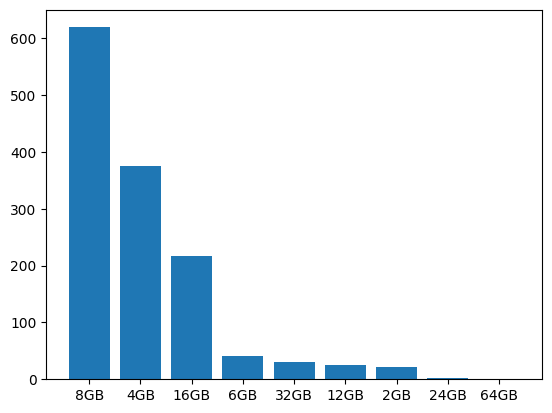

In [366]:
ram_counts = df['Ram'].value_counts()

plt.bar(ram_counts.index, ram_counts.values)

In [367]:
df[df['ScreenResolution'].str.contains('QHD',case=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
2,ASUS,Gaming,15.6,QHD 2560x1440,AMD Ryzen 9 6900HX 3.3GHz,32GB,1TB SSD,NVIDIA GeForce RTX 3070 Ti,Windows 11,2.4kg,185000.0
4,Dell,Gaming,16.0,QHD 2560x1600,Intel Core i9 12900HK 2.5GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,260000.0
6,MSI,Gaming,16.0,QHD 2560x1600,Intel Core i9 12900HX 2.6GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4090,Windows 11,2.6kg,350000.0
10,HP,Gaming,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4070,Windows 11,2.4kg,198000.0
12,Lenovo,Gaming,16.0,QHD 2560x1600,AMD Ryzen 9 6900HX 3.3GHz,32GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.4kg,165000.0
14,Lenovo,Gaming,16.0,QHD 2560x1600,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.5kg,135000.0
17,Acer,Gaming,16.0,QHD 2560x1600,AMD Ryzen 7 6800H 3.2GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.5kg,138000.0
19,Dell,Gaming,15.6,QHD 2560x1440,Intel Core i7 13620H 2.6GHz,16GB,1TB SSD,NVIDIA GeForce RTX 4060,Windows 11,2.2kg,145000.0
21,Razer,Gaming,15.6,QHD 2560x1440,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 4070,Windows 11,2.1kg,245000.0
23,MSI,Gaming,17.3,QHD 2560x1440,Intel Core i9 12900HX 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4090,Windows 11,2.9kg,380000.0


In [368]:
df[df['ScreenResolution'].str.contains('IPS',case=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.60
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.60
...,...,...,...,...,...,...,...,...,...,...,...
1285,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.12
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.72
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64


In [369]:
df['Company'].value_counts()

Company
Lenovo       301
Dell         301
HP           279
Asus         160
Acer         107
MSI           59
Toshiba       48
Apple         21
Samsung        9
Razer          9
Mediacom       7
Microsoft      6
ASUS           4
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [370]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                235
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [371]:
df = df.drop('TypeName',axis=1)

In [372]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52
2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00
3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34
4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81
...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.00
26,Asus,17.3,QHD 2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.00
27,Razer,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.00
28,MSI,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.00


In [373]:
df['ScreenType'] = df['ScreenResolution'].str.extract(r'^([A-Za-z\s]+)')

In [374]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType
0,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68,IPS Panel Retina Display
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52,NaN
2,HP,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00,Full HD
3,Apple,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34,IPS Panel Retina Display
4,Apple,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.00,Full HD
26,Asus,17.3,QHD 2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.00,QHD
27,Razer,16.0,QHD 2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.00,QHD
28,MSI,15.6,Full HD 1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.00,Full HD


In [375]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [376]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68,IPS Panel Retina Display
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52,NaN
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00,Full HD
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.34,IPS Panel Retina Display
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.81,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.00,Full HD
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.00,QHD
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.00,QHD
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.00,Full HD


In [377]:
df.tail()

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenType
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,2.3kg,128000.0,Full HD
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,3.0kg,295000.0,QHD
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,2.5kg,275000.0,QHD
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,2.3kg,152000.0,Full HD
29,HP,17.3,1920x1080,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 3080,Windows 11,3.0kg,225000.0,Full HD


In [378]:
df = df.drop('Weight',axis=1)

In [379]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,ScreenType
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.68,IPS Panel Retina Display
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.52,NaN
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.00,Full HD
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.34,IPS Panel Retina Display
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.81,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,128000.00,Full HD
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,295000.00,QHD
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,275000.00,QHD
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,152000.00,Full HD


In [380]:
df['ScreenType'].value_counts()

ScreenType
Full HD                      571
IPS Panel Full HD            288
Touchscreen                   35
IPS Panel                     34
Quad HD                       18
IPS Panel Retina Display      17
IPS Panel Touchscreen         15
QHD                           13
IPS Panel Quad HD             11
Name: count, dtype: int64

In [381]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620         281
Intel HD Graphics 520         185
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
                             ... 
Nvidia Quadro M3000M            1
Nvidia Quadro M500M             1
AMD Radeon R5 M315              1
AMD Radeon R7 M360              1
NVIDIA GeForce RTX 3070 Ti      1
Name: count, Length: 120, dtype: int64

In [382]:
df['Gpu_Model'] = df['Gpu'].str.split(' ', n=1).str[1]

In [383]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,ScreenType,Gpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.52,NaN,HD Graphics 6000
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.00,Full HD,HD Graphics 620
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA GeForce RTX 3060,Windows 11,128000.00,Full HD,GeForce RTX 3060
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA GeForce RTX 4080,Windows 11,295000.00,QHD,GeForce RTX 4080
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA GeForce RTX 4080,Windows 11,275000.00,QHD,GeForce RTX 4080
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA GeForce RTX 3070,Windows 11,152000.00,Full HD,GeForce RTX 3070


In [384]:
df['Gpu'] = df['Gpu'].str.split(' ').str[0]

In [385]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,ScreenType,Gpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,NVIDIA,Windows 11,128000.00,Full HD,GeForce RTX 3060
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,NVIDIA,Windows 11,295000.00,QHD,GeForce RTX 4080
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,NVIDIA,Windows 11,275000.00,QHD,GeForce RTX 4080
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,NVIDIA,Windows 11,152000.00,Full HD,GeForce RTX 3070


In [386]:
df['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
NVIDIA     30
ARM         1
Name: count, dtype: int64

In [387]:
df['Gpu'] = df['Gpu'].str.capitalize()

In [388]:
df['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    430
Amd       180
Arm         1
Name: count, dtype: int64

In [389]:
df = df.rename(columns={'Gpu':'Gpu_company'})

In [390]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu_company,OpSys,Price,ScreenType,Gpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070


In [391]:
df = df.rename(columns={'Gpu_company':'Gpu_Company'})

In [392]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070


In [393]:
df['Gpu_Model'].value_counts()

Gpu_Model
HD Graphics 620        281
HD Graphics 520        185
UHD Graphics 620        68
GeForce GTX 1050        66
GeForce GTX 1060        48
                      ... 
Quadro M3000M            1
Quadro M500M             1
Radeon R5 M315           1
Radeon R7 M360           1
GeForce RTX 3070 Ti      1
Name: count, Length: 120, dtype: int64

In [394]:
df['ScreenResolution'].value_counts()

ScreenResolution
1920x1080    858
1366x768     308
3840x2160     43
2560x1440     28
3200x1800     27
1600x900      23
2560x1600     14
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [395]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz      190
Intel Core i7 7700HQ 2.8GHz     146
Intel Core i7 7500U 2.7GHz      134
Intel Core i7 8550U 1.8GHz       73
Intel Core i5 8250U 1.6GHz       72
                               ... 
Intel Core i9 11900H 2.5GHz       1
Intel Core i7 1260P 2.1GHz        1
Intel Core i7 13620H 2.6GHz       1
AMD Ryzen 9 6900HS 3.3GHz         1
Intel Core i9 12900HX 2.5GHz      1
Name: count, Length: 132, dtype: int64

In [396]:
df['Cpu_Model'] = df['Cpu'].str.split(' ', n=1).str[1]

In [397]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz


In [398]:
df['Cpu_Company'] = df['Cpu'].str.split(' ').str[0]

In [399]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Cpu_Company
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,Intel
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz,Intel
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,Intel
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,Intel
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,Intel
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,Intel
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,Intel
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,Intel


In [400]:
df = df.drop('Cpu_Company',axis=1)

In [401]:
df

,Company,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz


In [402]:
df = df.rename(columns={'Cpu':'Cpu_Company'})

In [403]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32GB,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32GB,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16GB,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz


In [404]:
df['Ram'] = df['Ram'].str.replace('GB','',regex=False).astype(int)

In [405]:
df = df.rename(columns={'Memory':'Memory_in_GB'})

In [406]:
df = df.rename(columns={'Memory_in_GB':'Memory'})

In [407]:
df = df.rename(columns={'Ram':'Ram_in_GB'})

In [408]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz


In [409]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        123
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
1TB SSD                           34
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
2TB SSD                            5
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD         

In [410]:
df['Memory_Type'] = df['Memory'].str.extract(r'(?:GB|TB)\s*(.*)', expand=False)

In [411]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,512GB SSD,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32,2TB SSD,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32,1TB SSD,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,1TB SSD,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD


In [412]:
df['Memory'] = df['Memory'].str.extract(r'(\d+\s*(?:GB|TB))', expand=False)

In [413]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type
0,Apple,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD
1,Apple,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
2,HP,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD
3,Apple,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD
4,Apple,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,512GB,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD
26,Asus,17.3,2560x1440,Intel Core i9 12900H 2.5GHz,32,2TB,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD
27,Razer,16.0,2560x1600,Intel Core i7 13700H 2.4GHz,32,1TB,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD
28,MSI,15.6,1920x1080,Intel Core i7 12700H 2.3GHz,16,1TB,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD


In [414]:
df['Memory'].value_counts()

Memory
256GB    508
1TB      260
128GB    177
512GB    145
500GB    132
32GB      45
2TB       21
64GB      17
0TB       10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [415]:
df['Memory_Type'].value_counts()

Memory_Type
SSD                         667
HDD                         374
SSD +  1TB HDD              183
Flash Storage                74
SSD +  2TB HDD               15
Hybrid                       10
SSD +  256GB SSD              3
SSD +  500GB HDD              2
SSD +  1.0TB Hybrid           2
SSD +  512GB SSD              1
Flash Storage +  1TB HDD      1
HDD +  1TB HDD                1
Name: count, dtype: int64

In [416]:
df['Cpu_Company'] = df['Cpu_Company'].str.split().str[0]

In [417]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type
0,Apple,13.3,2560x1600,Intel,8,128GB,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD
1,Apple,13.3,1440x900,Intel,8,128GB,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
2,HP,15.6,1920x1080,Intel,8,256GB,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD
3,Apple,15.4,2880x1800,Intel,16,512GB,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD
4,Apple,13.3,2560x1600,Intel,8,256GB,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD
26,Asus,17.3,2560x1440,Intel,32,2TB,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD
27,Razer,16.0,2560x1600,Intel,32,1TB,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD
28,MSI,15.6,1920x1080,Intel,16,1TB,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD


In [418]:
df['Cpu_Company'].value_counts()

Cpu_Company
Intel      1264
AMD          68
Samsung       1
Name: count, dtype: int64

In [419]:
df['Company'].value_counts()

Company
Lenovo       301
Dell         301
HP           279
Asus         160
Acer         107
MSI           59
Toshiba       48
Apple         21
Samsung        9
Razer          9
Mediacom       7
Microsoft      6
ASUS           4
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [420]:
df['Inches'].value_counts()

Inches
15.6    677
14.0    199
17.3    171
13.3    164
12.5     39
11.6     33
16.0      8
13.5      6
13.9      6
12.0      6
12.3      5
15.4      4
10.1      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
16.1      1
Name: count, dtype: int64

In [421]:
df['ScreenResolution'].value_counts()

ScreenResolution
1920x1080    858
1366x768     308
3840x2160     43
2560x1440     28
3200x1800     27
1600x900      23
2560x1600     14
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: count, dtype: int64

In [422]:
df['Ram_in_GB'].value_counts()

Ram_in_GB
8     619
4     375
16    216
6      41
32     31
12     25
2      22
24      3
64      1
Name: count, dtype: int64

In [423]:
df['Company'].isna().sum()

np.int64(0)

In [424]:
df['Cpu_Company'].isna().sum()

np.int64(0)

In [425]:
df['Cpu_Model'].isna().sum()

np.int64(0)

In [426]:
df['Gpu_Company'].isna().sum()

np.int64(0)

In [427]:
df['Gpu_Model'].isna().sum()

np.int64(0)

In [428]:
df['Inches'].isna().sum()

np.int64(0)

In [429]:
df['Memory'].isna().sum()

np.int64(0)

In [430]:
df['Memory_Type'].isna().sum()

np.int64(0)

In [431]:
df['OpSys'].isna().sum()

np.int64(0)

In [432]:
df['Price'].isna().sum()

np.int64(0)

In [433]:
df['Ram_in_GB'].isna().sum()

np.int64(0)

In [434]:
df['ScreenResolution'].isna().sum()

np.int64(0)

In [435]:
df['ScreenType'].isna().sum()

np.int64(331)

In [436]:
df[df['ScreenType'].isna()]

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type
1,Apple,13.3,1440x900,Intel,8,128GB,Intel,macOS,47895.52,NaN,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
5,Acer,15.6,1366x768,AMD,4,500GB,Amd,Windows 10,21312.00,NaN,Radeon R5,A9-Series 9420 3GHz,HDD
7,Apple,13.3,1440x900,Intel,8,256GB,Intel,macOS,61735.54,NaN,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
10,HP,15.6,1366x768,Intel,4,500GB,Intel,No OS,20986.99,NaN,HD Graphics 620,Core i5 7200U 2.5GHz,HDD
20,Asus,11.6,1366x768,Intel,2,32GB,Intel,Windows 10,10224.43,NaN,HD Graphics 400,Atom x5-Z8350 1.44GHz,Flash Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,HP,11.6,1366x768,Intel,2,32GB,Intel,Windows 10,11135.52,NaN,HD Graphics 400,Celeron Dual Core N3060 1.6GHz,Flash Storage
1297,Asus,15.6,1366x768,Intel,4,500GB,Nvidia,Windows 10,38378.65,NaN,GeForce 920M,Core i7 6500U 2.5GHz,HDD
1300,Lenovo,14.0,1366x768,Intel,2,64GB,Intel,Windows 10,12201.12,NaN,HD Graphics,Celeron Dual Core N3050 1.6GHz,Flash Storage
1301,HP,15.6,1366x768,Intel,6,1TB,Amd,Windows 10,40705.92,NaN,Radeon R5 M330,Core i7 6500U 2.5GHz,HDD


In [437]:
df['ScreenType']=df['ScreenType'].fillna('Regular')

In [438]:
df['ScreenType'].isna().sum()

np.int64(0)

In [439]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type
0,Apple,13.3,2560x1600,Intel,8,128GB,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD
1,Apple,13.3,1440x900,Intel,8,128GB,Intel,macOS,47895.52,Regular,HD Graphics 6000,Core i5 1.8GHz,Flash Storage
2,HP,15.6,1920x1080,Intel,8,256GB,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD
3,Apple,15.4,2880x1800,Intel,16,512GB,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD
4,Apple,13.3,2560x1600,Intel,8,256GB,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD
26,Asus,17.3,2560x1440,Intel,32,2TB,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD
27,Razer,16.0,2560x1600,Intel,32,1TB,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD
28,MSI,15.6,1920x1080,Intel,16,1TB,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD


<h3>Feature Engineering<h3>

In [440]:
df['Company'].value_counts()

Company
Lenovo       301
Dell         301
HP           279
Asus         160
Acer         107
MSI           59
Toshiba       48
Apple         21
Samsung        9
Razer          9
Mediacom       7
Microsoft      6
ASUS           4
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

frequency encoding for company colum

In [441]:
company_freq = df['Company'].value_counts()

df['Company_freq'] = df['Company'].map(company_freq)

In [442]:
df['Company_freq'].value_counts()

Company_freq
301    602
279    279
160    160
107    107
59      59
48      48
21      21
9       18
3       12
4       12
7        7
6        6
2        2
Name: count, dtype: int64

frequency of each company

In [443]:
df[['Company','Company_freq']].drop_duplicates()

,Company,Company_freq
0,Apple,21
2,HP,279
5,Acer,107
8,Asus,160
13,Dell,301
18,Lenovo,301
30,Chuwi,3
58,MSI,59
70,Microsoft,6
143,Toshiba,48


In [444]:
df['Inches'].value_counts()

Inches
15.6    677
14.0    199
17.3    171
13.3    164
12.5     39
11.6     33
16.0      8
13.5      6
13.9      6
12.0      6
12.3      5
15.4      4
10.1      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
16.1      1
Name: count, dtype: int64

In [445]:
df['Ram_in_GB'].value_counts()

Ram_in_GB
8     619
4     375
16    216
6      41
32     31
12     25
2      22
24      3
64      1
Name: count, dtype: int64

In [446]:
ram_freq = df['Ram_in_GB'].value_counts()

df['Ram_in_GB_freq'] = df['Ram_in_GB'].map(ram_freq)

Frequency of each Ram

In [447]:
df[['Ram_in_GB','Ram_in_GB_freq']].drop_duplicates()

,Ram_in_GB,Ram_in_GB_freq
0,8,619
3,16,216
5,4,375
20,2,22
44,12,25
98,6,41
177,32,31
438,24,3
1066,64,1


In [448]:
inches_freq = df['Inches'].value_counts()

df['Inches_freq'] = df['Inches'].map(inches_freq)

df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type,Company_freq,Ram_in_GB_freq,Inches_freq
0,Apple,13.3,2560x1600,Intel,8,128GB,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD,21,619,164
1,Apple,13.3,1440x900,Intel,8,128GB,Intel,macOS,47895.52,Regular,HD Graphics 6000,Core i5 1.8GHz,Flash Storage,21,619,164
2,HP,15.6,1920x1080,Intel,8,256GB,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD,279,619,677
3,Apple,15.4,2880x1800,Intel,16,512GB,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD,21,216,4
4,Apple,13.3,2560x1600,Intel,8,256GB,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD,21,619,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD,107,216,677
26,Asus,17.3,2560x1440,Intel,32,2TB,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD,160,31,171
27,Razer,16.0,2560x1600,Intel,32,1TB,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD,9,31,8
28,MSI,15.6,1920x1080,Intel,16,1TB,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD,59,216,677


In [449]:
df['Inches_freq'].value_counts()

Inches_freq
677    677
199    199
171    171
164    164
39      39
33      33
6       18
4       12
8        8
1        5
5        5
2        2
Name: count, dtype: int64

frequency of each inch

In [450]:
df[['Inches','Inches_freq']].drop_duplicates()

,Inches,Inches_freq
0,13.3,164
2,15.6,677
3,15.4,4
8,14.0,199
14,12.0,6
20,11.6,33
29,17.3,171
50,10.1,4
70,13.5,6
146,12.5,39


In [451]:
df['Memory'].value_counts()     

Memory
256GB    508
1TB      260
128GB    177
512GB    145
500GB    132
32GB      45
2TB       21
64GB      17
0TB       10
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [452]:
df[df['Memory']=='0TB']

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type,Company_freq,Ram_in_GB_freq,Inches_freq
151,Dell,15.6,1920x1080,Intel,8,0TB,Nvidia,Windows 10,47898.72,Full HD,GeForce GTX 1050,Core i7 7700HQ 2.8GHz,Hybrid,301,619,677
1010,Dell,15.6,1920x1080,Intel,8,0TB,Nvidia,Windows 10,50562.72,Full HD,GeForce GTX 1050,Core i5 7300HQ 2.5GHz,Hybrid,301,619,677
1075,Lenovo,17.3,1600x900,Intel,8,0TB,Amd,Windows 10,35111.52,Regular,Radeon R5 M330,Core i5 6200U 2.3GHz,HDD,301,619,171
1135,Lenovo,15.6,1920x1080,Intel,16,0TB,Amd,Windows 10,58554.72,Full HD,Radeon R7 M360,Core i7 6500U 2.5GHz,Hybrid,301,216,677
1158,Lenovo,15.6,1920x1080,Intel,8,0TB,Amd,Windows 10,42010.75,Full HD,Radeon R5 M330,Core i5 6200U 2.3GHz,Hybrid,301,619,677
1176,Lenovo,15.6,1920x1080,Intel,4,0TB,Intel,Windows 7,43956.00,Full HD,HD Graphics 520,Core i7 6500U 2.5GHz,Hybrid,301,375,677
1258,Lenovo,15.6,1920x1080,Intel,8,0TB,Amd,Windows 7,47685.60,Full HD,Radeon R5 M330,Core i7 6500U 2.5GHz,Hybrid,301,619,677
1266,HP,15.6,1920x1080,AMD,6,0TB,Amd,Windows 10,29303.47,Full HD,Radeon R7 M440,A9-Series 9410 2.9GHz,Hybrid,279,41,677
1280,HP,15.6,1920x1080,AMD,6,0TB,Amd,Windows 10,29303.47,Full HD,Radeon R7 M440,A9-Series 9410 2.9GHz,Hybrid,279,41,677
1294,HP,15.6,1920x1080,AMD,6,0TB,Amd,Windows 10,29303.47,Full HD,Radeon R7 M440,A9-Series 9410 2.9GHz,Hybrid,279,41,677


In [453]:
df.drop(df[df['Memory'] == '0TB'].index, inplace=True)

In [454]:
df['Memory'].value_counts()

Memory
256GB    508
1TB      260
128GB    177
512GB    145
500GB    132
32GB      45
2TB       21
64GB      17
16GB      10
180GB      5
240GB      1
8GB        1
508GB      1
Name: count, dtype: int64

In [455]:
memory_freq = df['Memory'].value_counts()

df['Memory_freq'] = df['Memory'].map(memory_freq)

In [456]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,Gpu_Company,OpSys,Price,ScreenType,Gpu_Model,Cpu_Model,Memory_Type,Company_freq,Ram_in_GB_freq,Inches_freq,Memory_freq
0,Apple,13.3,2560x1600,Intel,8,128GB,Intel,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,Core i5 2.3GHz,SSD,21,619,164,177
1,Apple,13.3,1440x900,Intel,8,128GB,Intel,macOS,47895.52,Regular,HD Graphics 6000,Core i5 1.8GHz,Flash Storage,21,619,164,177
2,HP,15.6,1920x1080,Intel,8,256GB,Intel,No OS,30636.00,Full HD,HD Graphics 620,Core i5 7200U 2.5GHz,SSD,279,619,677,508
3,Apple,15.4,2880x1800,Intel,16,512GB,Amd,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,Core i7 2.7GHz,SSD,21,216,4,145
4,Apple,13.3,2560x1600,Intel,8,256GB,Intel,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,Core i5 3.1GHz,SSD,21,619,164,508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Nvidia,Windows 11,128000.00,Full HD,GeForce RTX 3060,Core i7 12700H 2.3GHz,SSD,107,216,677,145
26,Asus,17.3,2560x1440,Intel,32,2TB,Nvidia,Windows 11,295000.00,QHD,GeForce RTX 4080,Core i9 12900H 2.5GHz,SSD,160,31,171,21
27,Razer,16.0,2560x1600,Intel,32,1TB,Nvidia,Windows 11,275000.00,QHD,GeForce RTX 4080,Core i7 13700H 2.4GHz,SSD,9,31,8,260
28,MSI,15.6,1920x1080,Intel,16,1TB,Nvidia,Windows 11,152000.00,Full HD,GeForce RTX 3070,Core i7 12700H 2.3GHz,SSD,59,216,677,260


Frequency for each memory

In [457]:
df[['Memory','Memory_freq']].drop_duplicates()

,Memory,Memory_freq
0,128GB,177
2,256GB,508
3,512GB,145
5,500GB,132
18,1TB,260
20,32GB,45
30,64GB,17
76,2TB,21
290,16GB,10
477,180GB,5


In [458]:
df['Gpu_Company'].value_counts()

Gpu_Company
Intel     721
Nvidia    428
Amd       173
Arm         1
Name: count, dtype: int64

Using one hot encoding for Gpu_Company

In [459]:
df['Gpu_Company_orig'] = df['Gpu_Company']  # keep original
df = pd.get_dummies(df, columns=['Gpu_Company'], dtype=int)

In [460]:
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,Memory_Type,Company_freq,Ram_in_GB_freq,Inches_freq,Memory_freq,Gpu_Company_orig,Gpu_Company_Amd,Gpu_Company_Arm,Gpu_Company_Intel,Gpu_Company_Nvidia
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,SSD,21,619,164,177,Intel,0,0,1,0
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,Flash Storage,21,619,164,177,Intel,0,0,1,0
2,HP,15.6,1920x1080,Intel,8,256GB,No OS,30636.00,Full HD,HD Graphics 620,...,SSD,279,619,677,508,Intel,0,0,1,0
3,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,SSD,21,216,4,145,Amd,1,0,0,0
4,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,SSD,21,619,164,508,Intel,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,SSD,107,216,677,145,Nvidia,0,0,0,1
26,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,SSD,160,31,171,21,Nvidia,0,0,0,1
27,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,SSD,9,31,8,260,Nvidia,0,0,0,1
28,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,SSD,59,216,677,260,Nvidia,0,0,0,1


In [ ]:
df['OpSys'].value_counts()

OpSys
Windows 10      1065
No OS             66
Linux             62
Windows 7         43
Windows 11        29
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

frequency encoding for 'OpSys

In [462]:
op_sys_freq = df['OpSys'].value_counts()
df['OpSys_freq'] = df['OpSys'].map(op_sys_freq)
df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,Company_freq,Ram_in_GB_freq,Inches_freq,Memory_freq,Gpu_Company_orig,Gpu_Company_Amd,Gpu_Company_Arm,Gpu_Company_Intel,Gpu_Company_Nvidia,OpSys_freq
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,21,619,164,177,Intel,0,0,1,0,13
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,21,619,164,177,Intel,0,0,1,0,13
2,HP,15.6,1920x1080,Intel,8,256GB,No OS,30636.00,Full HD,HD Graphics 620,...,279,619,677,508,Intel,0,0,1,0,66
3,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,21,216,4,145,Amd,1,0,0,0,13
4,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,21,619,164,508,Intel,0,0,1,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,107,216,677,145,Nvidia,0,0,0,1,29
26,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,160,31,171,21,Nvidia,0,0,0,1,29
27,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,9,31,8,260,Nvidia,0,0,0,1,29
28,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,59,216,677,260,Nvidia,0,0,0,1,29


In [463]:
df[['OpSys','OpSys_freq']].drop_duplicates()

,OpSys,OpSys_freq
0,macOS,13
2,No OS,66
5,Windows 10,1065
6,Mac OS X,8
36,Linux,62
50,Android,2
70,Windows 10 S,8
290,Chrome OS,27
525,Windows 7,43
0,Windows 11,29


In [466]:
df.drop(df[df['OpSys'] == 'No OS'].index, inplace=True)

frequency for each OS

In [467]:
df[['OpSys','OpSys_freq']].drop_duplicates()

,OpSys,OpSys_freq
0,macOS,13
5,Windows 10,1065
6,Mac OS X,8
36,Linux,62
50,Android,2
70,Windows 10 S,8
290,Chrome OS,27
525,Windows 7,43
0,Windows 11,29


In [468]:
df['ScreenType'].value_counts()

ScreenType
Full HD                      536
Regular                      301
IPS Panel Full HD            274
Touchscreen                   35
IPS Panel                     34
Quad HD                       18
IPS Panel Retina Display      17
IPS Panel Touchscreen         15
IPS Panel Quad HD             11
QHD                           11
Name: count, dtype: int64

One hot encoding for ScreenType

In [469]:
screen_dummies = pd.get_dummies(df['ScreenType'], prefix='ScreenType', dtype=int)

df = pd.concat([df, screen_dummies], axis=1)

df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,ScreenType_Full HD,ScreenType_IPS Panel,ScreenType_IPS Panel Full HD,ScreenType_IPS Panel Quad HD,ScreenType_IPS Panel Retina Display,ScreenType_IPS Panel Touchscreen,ScreenType_QHD,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,0,0,0,0,1,0,0,0,0,0
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,0,0,0,0,0,0,0,0,1,0
3,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,0,0,0,0,1,0,0,0,0,0
4,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,0,0,0,0,1,0,0,0,0,0
5,Acer,15.6,1366x768,AMD,4,500GB,Windows 10,21312.00,Regular,Radeon R5,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,1,0,0,0,0,0,0,0,0,0
26,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,0,0,0,0,0,0,1,0,0,0
27,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,0,0,0,0,0,0,1,0,0,0
28,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,1,0,0,0,0,0,0,0,0,0


In [470]:
df['Gpu_Model'].value_counts()

Gpu_Model
HD Graphics 620     270
HD Graphics 520     170
UHD Graphics 620     68
GeForce GTX 1050     61
GeForce GTX 1060     45
                   ... 
Mali T860 MP4         1
Radeon R5 M315        1
FirePro W6150M        1
Quadro M500M          1
Quadro M3000M         1
Name: count, Length: 118, dtype: int64

frequency encoding for Gpu_Model

In [476]:
gpu_model_freq = df['Gpu_Model'].value_counts()
df
df['Gpu_Model_freq'] = df['Gpu_Model'].map(gpu_model_freq)

df

,Company,Inches,ScreenResolution,Cpu_Company,Ram_in_GB,Memory,OpSys,Price,ScreenType,Gpu_Model,...,ScreenType_IPS Panel,ScreenType_IPS Panel Full HD,ScreenType_IPS Panel Quad HD,ScreenType_IPS Panel Retina Display,ScreenType_IPS Panel Touchscreen,ScreenType_QHD,ScreenType_Quad HD,ScreenType_Regular,ScreenType_Touchscreen,Gpu_Model_freq
0,Apple,13.3,2560x1600,Intel,8,128GB,macOS,71378.68,IPS Panel Retina Display,Iris Plus Graphics 640,...,0,0,0,1,0,0,0,0,0,8
1,Apple,13.3,1440x900,Intel,8,128GB,macOS,47895.52,Regular,HD Graphics 6000,...,0,0,0,0,0,0,0,1,0,5
3,Apple,15.4,2880x1800,Intel,16,512GB,macOS,135195.34,IPS Panel Retina Display,Radeon Pro 455,...,0,0,0,1,0,0,0,0,0,1
4,Apple,13.3,2560x1600,Intel,8,256GB,macOS,96095.81,IPS Panel Retina Display,Iris Plus Graphics 650,...,0,0,0,1,0,0,0,0,0,2
5,Acer,15.6,1366x768,AMD,4,500GB,Windows 10,21312.00,Regular,Radeon R5,...,0,0,0,0,0,0,0,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Acer,15.6,1920x1080,Intel,16,512GB,Windows 11,128000.00,Full HD,GeForce RTX 3060,...,0,0,0,0,0,0,0,0,0,6
26,Asus,17.3,2560x1440,Intel,32,2TB,Windows 11,295000.00,QHD,GeForce RTX 4080,...,0,0,0,0,0,1,0,0,0,3
27,Razer,16.0,2560x1600,Intel,32,1TB,Windows 11,275000.00,QHD,GeForce RTX 4080,...,0,0,0,0,0,1,0,0,0,3
28,MSI,15.6,1920x1080,Intel,16,1TB,Windows 11,152000.00,Full HD,GeForce RTX 3070,...,0,0,0,0,0,0,0,0,0,3


frequency for each gpu model

In [477]:
df[['Gpu_Model','Gpu_Model_freq']].drop_duplicates()

,Gpu_Model,Gpu_Model_freq
0,Iris Plus Graphics 640,8
1,HD Graphics 6000,5
3,Radeon Pro 455,1
4,Iris Plus Graphics 650,2
5,Radeon R5,11
...,...,...
6,GeForce RTX 4090,2
7,GeForce RTX 3070,3
9,GeForce RTX 3050,2
19,GeForce RTX 4060,2


In [478]:
df.to_csv('Laptop_data_refined.csv',index=False)